# 실습 7:Numerical ODE (2024.11.27)
### 빅데이터수치해석 입문 및 실습
### 숙명여자대학교 기계시스템학부 심주용

### Reference:
 - Advanced Engineering Mathematics Book by Erwin Kreyszig



# Bouncing Ball Simulation with Drag: Analytical vs Numerical Solutions

To modify the LaTeX code, ensure that each equation is enclosed within dollar signs (`$`) to indicate mathematical mode. Use a single `$` for inline equations and double `$$` for block (display) equations. Here's a description of how to rewrite the equations using this convention:

---

The vertical motion of the ball is governed by the equation $ \frac{d^2y}{dt^2} = -g - c_d \frac{dy}{dt} $.

### Block (Display) Equations
For standalone equations or systems of equations, use double dollar signs to center and format the equations as a block:

$$
\frac{d^2y}{dt^2} = -g - c_d \frac{dy}{dt}, \quad y(0) = y_0, \quad \frac{dy}{dt}(0) = v_0
$$

$$
\frac{d^2x}{dt^2} = -c_d \frac{dx}{dt}, \quad x(0) = 0, \quad \frac{dx}{dt}(0) = v_x
$$

---

### Multiple Equations with Alignment
For a system of equations that need alignment, wrap them in double dollar signs and use alignment operators like `\\` (new line) and `&` (alignment point):

$$
\begin{aligned}
\frac{d^2y}{dt^2} &= -g - c_d \frac{dy}{dt}, \\
\frac{d^2x}{dt^2} &= -c_d \frac{dx}{dt}.
\end{aligned}
$$


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Step 1: Define the simulation parameters
g = 9.81  # Acceleration due to gravity (m/s^2)
v0 = 8.0  # Initial vertical velocity (m/s)
y0 = 5.0  # Initial height (m)
x_speed = 1.0  # Initial horizontal speed (m/s)
restitution = 0.8  # Coefficient of restitution (energy loss factor)
drag_coefficient = 0.1  # Drag coefficient
t_end = 7.0  # Total simulation time (s)
h = 0.02  # Time step (s)

# Step 2: Analytical solution with drag
def analytical_bouncing_ball_with_drag(y0, v0, g, drag_coefficient, restitution, t_values):
    """
    Calculate the analytical solution for a bouncing ball with drag.
    Args:
        y0: Initial height (m)
        v0: Initial vertical velocity (m/s)
        g: Acceleration due to gravity (m/s^2)
        drag_coefficient: Drag coefficient (proportional to air resistance)
        restitution: Coefficient of restitution (energy loss)
        t_values: Time array (s)
    Returns:
        x_analytical, y_analytical: Horizontal and vertical positions
    """
    y_analytical = []
    x_analytical = []
    current_vy = v0
    current_y = y0
    x = 0
    t_last_bounce = 0

    for t in t_values:
        # Calculate time since the last bounce
        t_since_bounce = t - t_last_bounce
        # Vertical motion with drag
        exp_factor = np.exp(-drag_coefficient * t_since_bounce)
        vy_t = (current_vy + g / drag_coefficient) * exp_factor - g / drag_coefficient
        y_t = current_y - (g / drag_coefficient) * t_since_bounce + (current_vy + g / drag_coefficient) * (1 - exp_factor) / drag_coefficient

        # Check for ground collision
        if y_t < 0:
            current_vy = -vy_t * restitution
            current_y = 0
            t_last_bounce = t
            y_t = 0

        y_analytical.append(y_t)
        x += x_speed * h  # Horizontal motion with constant speed
        x_analytical.append(x)

    return np.array(x_analytical), np.array(y_analytical)

# Step 3: Numerical solution with drag
def numerical_bouncing_ball_with_drag(y0, v0, g, x_speed, restitution, drag_coefficient, h, t_end):
    """
    Simulate the motion of a bouncing ball with drag in 2D using numerical iteration.
    Args:
        y0: Initial height (m)
        v0: Initial vertical velocity (m/s)
        g: Acceleration due to gravity (m/s^2)
        x_speed: Horizontal speed (m/s)
        restitution: Coefficient of restitution (energy loss)
        drag_coefficient: Drag coefficient (proportional to air resistance)
        h: Time step (s)
        t_end: Total simulation time (s)
    Returns:
        t_values, x_values, y_values: Time, horizontal positions, and vertical positions
    """
    t = 0
    y = y0
    vy = v0
    x = 0
    vx = x_speed

    t_values = [t]
    x_values = [x]
    y_values = [y]

    while t < t_end:
        # Update vertical motion
        ay = -g - drag_coefficient * vy
        y += h * vy
        vy += h * ay

        # Update horizontal motion
        ax = -drag_coefficient * vx
        x += h * vx
        vx += h * ax

        # Check for ground collision
        if y < 0:
            y = 0
            vy = -vy * restitution  # Reverse and reduce vertical velocity

        # Append updated values
        t += h
        t_values.append(t)
        x_values.append(x)
        y_values.append(y)

    return np.array(t_values), np.array(x_values), np.array(y_values)

# Step 4: Simulate both solutions
t_values = np.arange(0, t_end, h)
x_analytical, y_analytical = analytical_bouncing_ball_with_drag(y0, v0, g, drag_coefficient, restitution, t_values)
t_numerical, x_numerical, y_numerical = numerical_bouncing_ball_with_drag(y0, v0, g, x_speed, restitution, drag_coefficient, h, t_end)

# Step 5: Create an animated visualization using Plotly
fig = go.Figure(
    data=[
        go.Scatter(x=[x_analytical[0]], y=[y_analytical[0]], mode="markers", marker=dict(size=15), name="Analytical Solution"),
        go.Scatter(x=[x_numerical[0]], y=[y_numerical[0]], mode="markers", marker=dict(size=15), name="Numerical Solution")
    ],
    layout=go.Layout(
        title="Bouncing Ball Simulation with Drag: Analytical vs Numerical Solutions",
        xaxis=dict(title="Horizontal Distance (m)", range=[0, max(x_analytical) + 1]),
        yaxis=dict(title="Height (m)", range=[0, max(y_analytical) + 1]),
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(label="Play", method="animate", args=[None, dict(frame=dict(duration=20, redraw=True), fromcurrent=True)]),
                    dict(label="Pause", method="animate", args=[None, dict(frame=dict(duration=0, redraw=False))])
                ]
            )
        ]
    ),
    frames=[
        go.Frame(
            data=[
                go.Scatter(x=[x_analytical[i]], y=[y_analytical[i]], mode="markers", marker=dict(size=15), name="Analytical Solution"),
                go.Scatter(x=[x_numerical[i]], y=[y_numerical[i]], mode="markers", marker=dict(size=15), name="Numerical Solution")
            ],
            name=f"frame{i}"
        )
        for i in range(len(t_values))
    ]
)

# Show the plot
fig.show()


# Ordinary differential equations


In [ ]:
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import sympy
sympy.init_printing()

In [ ]:
from scipy import integrate

## Symbolic ODE solving with SymPy

In [ ]:
x, y0 = sympy.symbols("x, y0")
y = sympy.Function("y")
ode = y(x).diff(x) - x - y(x)
ode

            d       
-x - y(x) + ──(y(x))
            dx      

In [ ]:
ode_sol = sympy.dsolve(ode)
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [ ]:
ode_sol = ode_sol.simplify()
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [ ]:
ode_sol.lhs

y(x)

In [ ]:
ode_sol.rhs

    x        
C₁⋅ℯ  - x - 1

In [ ]:
ode_sol.free_symbols

{C₁, x}

### Function for applying initial conditions

In [ ]:
ics = {y(0): y0}
ics

{y(0): y₀}

In [ ]:
ode_sol.subs(x, 0)

y(0) = C₁ - 1

In [ ]:
C_eq = ode_sol.subs(x, 0).subs(ics)
C_eq

y₀ = C₁ - 1

In [ ]:
C_sol = sympy.solve(C_eq)
C_sol

[{C₁: y₀ + 1}]

In [ ]:
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [ ]:
C_sol[0]

{C₁: y₀ + 1}

In [ ]:
ode_sol.subs(C_sol[0])

                      x    
y(x) = -x + (y₀ + 1)⋅ℯ  - 1

In [ ]:
ode_sol_y0 = ode_sol.subs(C_sol[0])
ode_sol_y0_1 = ode_sol_y0.rhs.subs({y0: 1})
ode_sol_y0_1

        x    
-x + 2⋅ℯ  - 1

In [ ]:
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [ ]:
C_sol[0]

{C₁: y₀ + 1}

In [ ]:
ode_sol_y0 = ode_sol.subs(C_sol[0])
ode_sol_y0

                      x    
y(x) = -x + (y₀ + 1)⋅ℯ  - 1

In [ ]:
ode_sol_y0.free_symbols

{x, y₀}

In [ ]:
y_x = sympy.lambdify((x, y0), ode_sol_y0.rhs, 'numpy')
y_x

<function _lambdifygenerated(x, y0)>

In [ ]:
y_x(1,1)

3.43656365691809

In [ ]:
x_np = np.linspace(0, 4, 10)
x_np

array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
       2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ])

In [ ]:
ode_sol_y0.rhs

               x    
-x + (y₀ + 1)⋅ℯ  - 1

In [ ]:
y_x(x_np,1)

array([  1.        ,   1.67480255,   2.97596202,   5.25400246,
         9.0556094 ,  15.23340648,  25.11716552,  40.78082992,
        65.45897054, 104.19630007])

In [ ]:
'%d' % 1

'1'

1
2
3


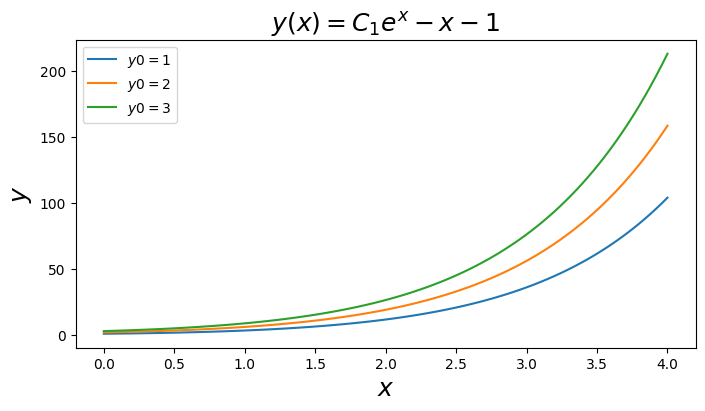

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

x_np = np.linspace(0, 4, 100)
y0_np = [1,2,3]

for k in [1, 2, 3]:
    print(k)
    ax.plot(x_np, y_x(x_np, k), label=r"$y0=%d$" % k)

ax.set_title(r"$%s$" % sympy.latex(ode_sol), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

## Direction Fields

In [ ]:
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):

    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')

    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)

    return ax

In [ ]:
x = sympy.symbols("x")

In [ ]:
y = sympy.Function("y")

<Axes: title={'center': '$\\frac{d}{d x} y{\\left(x \\right)} = x - y{\\left(x \\right)}$'}>

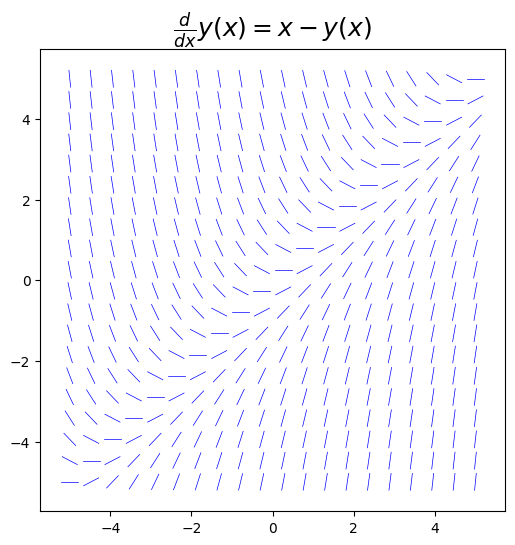

In [ ]:
plot_direction_field(x, y(x), x - y(x))

# fig.savefig('field.pdf')

## Solutions to ODEs

In [ ]:
x = sympy.symbols("x")

In [ ]:
y = sympy.Function("y")

In [ ]:
f = x + y(x)
# f = y(x)**2 + x

In [ ]:
sympy.Eq(y(x).diff(x), f)

d                  
──(y(x)) = x + y(x)
dx                 

In [ ]:
ode_sol = sympy.dsolve(y(x).diff(x) - f)
ode_sol = ode_sol.simplify()
ode_sol

           x        
y(x) = C₁⋅ℯ  - x - 1

In [ ]:
ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f,ics = ics)
ode_sol = ode_sol.simplify()
ode_sol

             x    
y(x) = -x + ℯ  - 1

(-5.0, 5.0)

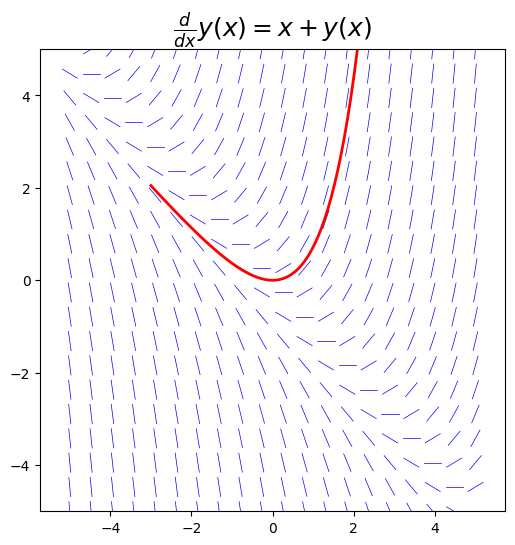

In [ ]:
plot_direction_field(x, y(x), f)
x_vec = np.linspace(-3, 5, 100)
plt.plot(x_vec, sympy.lambdify(x, ode_sol.rhs)(x_vec), 'r', lw=2)
plt.ylim(-5, 5)

# Numerical ODE

Solve ODE $y' = y+x, y(0)=0$ for $x=0,...,1.0$ with step $h =0.2$

## Euler Method

x:0.0, y_exact:0.000000, y_euler:0.000000
x:0.2, y_exact:0.021400, y_euler:0.000000
x:0.4, y_exact:0.091820, y_euler:0.040000
x:0.6, y_exact:0.222120, y_euler:0.128000
x:0.8, y_exact:0.425540, y_euler:0.273600
x:1.0, y_exact:0.718280, y_euler:0.488320
x:1.2, y_exact:1.120120, y_euler:0.785980
x:1.4, y_exact:1.655200, y_euler:1.183180
x:1.6, y_exact:2.353030, y_euler:1.699820
x:1.8, y_exact:3.249650, y_euler:2.359780
x:2.0, y_exact:4.389060, y_euler:3.191740


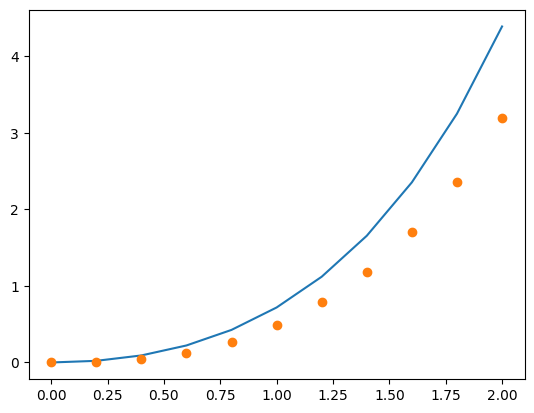

In [ ]:
def func(x,y):
    return x + y  # y' = f(x,y) = x + y => y' - (x + y) = 0

h = 0.2
xs = []
ys = []
y_num = []

yi = 0

for i in range(11):
    x = np.round(i*h,2)
    y = np.round(-x + np.exp(x) -1, 5)
    yi1 = np.round(yi + h*func(x,yi),5)

    xs.append(x)
    ys.append(y)

    y_num.append(yi)
    print(f'x:{x}, y_exact:{y:.6f}, y_euler:{yi:.6f}')

    yi = yi1

plt.plot(xs, ys)
plt.plot(xs,y_num,'o')

## Runge-Kutta

x:0.0, y_exact:0.000000, y_rk4:0.000000
x:0.2, y_exact:0.021400, y_rk4:0.021400
x:0.4, y_exact:0.091820, y_rk4:0.091820
x:0.6, y_exact:0.222120, y_rk4:0.222110
x:0.8, y_exact:0.425540, y_rk4:0.425530
x:1.0, y_exact:0.718280, y_rk4:0.718260
x:1.2, y_exact:1.120120, y_rk4:1.120090
x:1.4, y_exact:1.655200, y_rk4:1.655160
x:1.6, y_exact:2.353030, y_rk4:2.352980
x:1.8, y_exact:3.249650, y_rk4:3.249580
x:2.0, y_exact:4.389060, y_rk4:4.388970


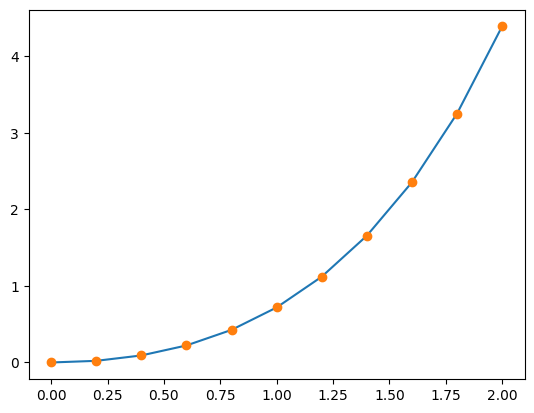

In [ ]:
def func(x,y):
    return x + y

h = 0.2
xs = []
ys = []
y_num = []

yi = 0
yi1
for i in range(11):
    x = np.round(i*h,2)
    y = np.round(-x + np.exp(x) -1, 5)
    k1 = func(x,yi)
    k2 = func(x+h/2,y+h/2*k1)
    k3 = func(x+h/2,y+h/2*k2)
    k4 = func(x+h,y+h*k3)

    yi1 = np.round(yi + h*(k1+2*k2+2*k3+k4)/6,5)

    xs.append(x)
    ys.append(y)

    y_num.append(yi)
    print(f'x:{x}, y_exact:{y:.6f}, y_rk4:{yi:.6f}')

    yi = yi1

plt.plot(xs, ys)
plt.plot(xs,y_num,'o')

## 2021 기말고사 기출 문제 1. Numerical Ordinary Differential Equation (20점)
다음 그림과 같이 Mass, Spring, Damper 시스템의 운동 방정식을 아래 식 (1)과 같이 나타낼 수 있다. 이때 물체의 질량 m = 1 kg, 감쇄계수 c = 10, 스프링계수 k = 100으로 가정한다.

식 (1):  $m\frac{d^2y}{dt^2}+c\frac{dy}{dt}+ky=0,y\left(0\right)=3,{\ y}^\prime\left(0\right)=0$
	이 물체를 오른쪽으로 3미터 당겼다가 놓았을 때 시간에 따른 물체의 궤적을 Euler 방법과 4차 Runge-Kutta 방법으로 미분방정식 풀어서 1.5 초까지의 궤적 y(t)를 그래프로 그려라. 이때, 간격 h = 0.02 초로 정의한다.


### 문제 1-(1)
이 물체를 오른쪽으로 3미터 당겼다가 놓았을 때 시간에 따른 물체의 궤적을 Euler 방법과 4차 Runge-Kutta 방법으로 미분방정식 풀어서 1.5 초까지의 궤적 y(t)를 그래프로 그려라. 이때, 간격 h = 0.02 초로 정의한다.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy
# sympy.init_printing()

plt.rcParams['figure.figsize'] = [14, 4]
plt.rcParams.update({'font.size': 13})

In [ ]:


t = sympy.symbols('t')
y = sympy.Function('y')

f = y(t).diff(t, 2) + 10*y(t).diff(t) + 100*y(t)
ics = {y(0) : 3, y(t).diff(t).subs(t,0) : 0}

ode_sol = sympy.dsolve(f, ics = ics)
ode_sol = ode_sol.simplify()
ode_sol

             -5⋅t    ⎛         π⎞
y(t) = 2⋅√3⋅ℯ    ⋅sin⎜5⋅√3⋅t + ─⎟
                     ⎝         3⎠

In [ ]:
t = sympy.symbols('t')
y1 = sympy.Function('y1')
y2 = sympy.Function('y2')  # y2 = y1' = y'

deq_y1 = sympy.Eq(y1(t).diff(t), y2(t))
deq_y2 = sympy.Eq(y2(t).diff(t), 10*y2(t) + 100*y1(t))

deq_y1, deq_y2

⎛d                  d                               ⎞
⎜──(y₁(t)) = y₂(t), ──(y₂(t)) = 100⋅y₁(t) + 10⋅y₂(t)⎟
⎝dt                 dt                              ⎠

In [ ]:
def func_y1(y2) :
    return y2

def func_y2(y2, y1) :
    return - 10*y2 - 100*y1

ti = 0
y1_i = 3
y2_i = 0

ts = []
ys_E = []

h = 0.02
N = 75
for i in range(N+1) :
    y1_i1 = y1_i + h*func_y1(y2_i)
    y2_i1 = y2_i + h*func_y2(y2_i, y1_i)

    ts.append(ti)
    ys_E.append(y1_i)

    ti += h
    y1_i = y1_i1
    y2_i = y2_i1

ti = 0
y1_i = 3
y2_i = 0

ts = []
ys_R = []

for i in range(N+1) :
    k1_1 = func_y1(y2_i)
    k2_1 = func_y2(y2_i, y1_i)

    k1_2 = func_y1(y2_i) + h*k2_1/2
    k2_2 = func_y2(y2_i+h/2*k2_1, y1_i+h/2*k1_1)

    k1_3 = func_y1(y2_i) + h*k2_2/2
    k2_3 = func_y2(y2_i+h/2*k2_2, y1_i+h/2*k1_2)

    k1_4 = func_y1(y2_i) + h*k2_3/2
    k2_4 = func_y2(y2_i+h/2*k2_3, y1_i+h/2*k1_3)

    y1_i1 = y1_i + h/6*(k1_1+2*k1_2+2*k1_3+k1_4)
    y2_i1 = y2_i + h/6*(k2_1+2*k2_2+2*k2_3+k2_4)

    ts.append(ti)
    ys_R.append(y1_i)

    ti += h
    y1_i = y1_i1
    y2_i = y2_i1

t_vec = np.array(ts)
y_func = sympy.lambdify((t), ode_sol.rhs, "numpy")
# y = 2*sqrt(3)*exp(-5*ti)*sin(5*sqrt(3)*ti+pi/3)
y_vec_E = y_func(t_vec)
y_vec_R = y_func(t_vec)


### 답 1-(1): 물체 궤적의 Euler해와 Runge-Kutta해 그래프


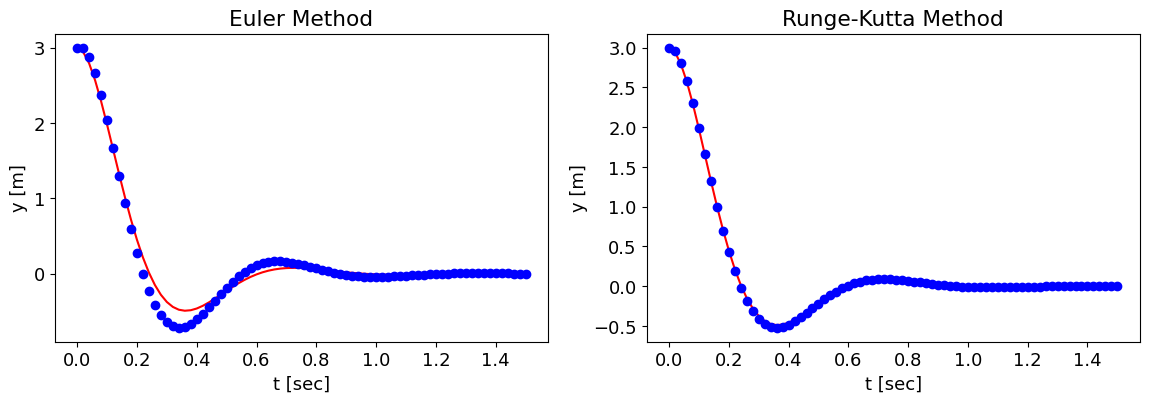

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(t_vec, y_vec_E, 'r')
ax1.set_xlabel('t [sec]')
ax1.set_ylabel('y [m]')
ax1.plot(ts, ys_E, 'o', color='b')
ax1.title.set_text('Euler Method')

ax2 = fig.add_subplot(122)
ax2.plot(t_vec, y_vec_R, 'r')
ax2.plot(ts, ys_R, 'o', color='b')
ax2.set_xlabel('t [sec]')
ax2.set_ylabel('y [m]')
ax2.title.set_text('Runge-Kutta Method')

### 문제 1-(2)
이때, 0.5초에서 Euler 방법으로 예측한 물체의 위치가 실제 엄밀해로 구한 물체의 위치와의 오차를 계산하여라.

### 답 1-(2): 0.5초에서 Euler 방법 오차 0.1819

In [ ]:
ts = np.array(ts).round(5)
ys_E = np.array(ys_E)
ys_E[np.where(ts==0.5)]


array([-0.18192122])

## 문제 1-(3)
위 (1)의 0.5초에서 Runge-Kutta 방법으로 예측한 물체의 위치가 실제 엄밀해로 구한 물체의 위치와의 오차를 계산하세요.

### 답 1-(3): 0.5초에서  Runge-Kutta 방법 오차 0.2216

In [ ]:
ys_R = np.array(ys_R)
ys_R[np.where(ts==0.5)]

array([-0.22161322])

## 문제 1-(4)
위에서 감쇄계수 감소 혹은 스프링 계수 증가에 따라 물체의 궤적이 변화를 서술하세요.

### 답 1-(4): 감쇄계수가 감소하거나 스프링 계수가 증가할 수록 t가 증가함에 따라 진동의 진폭이 점점 커지면서 물체는 비감쇠 강제진동을 하게 된다.

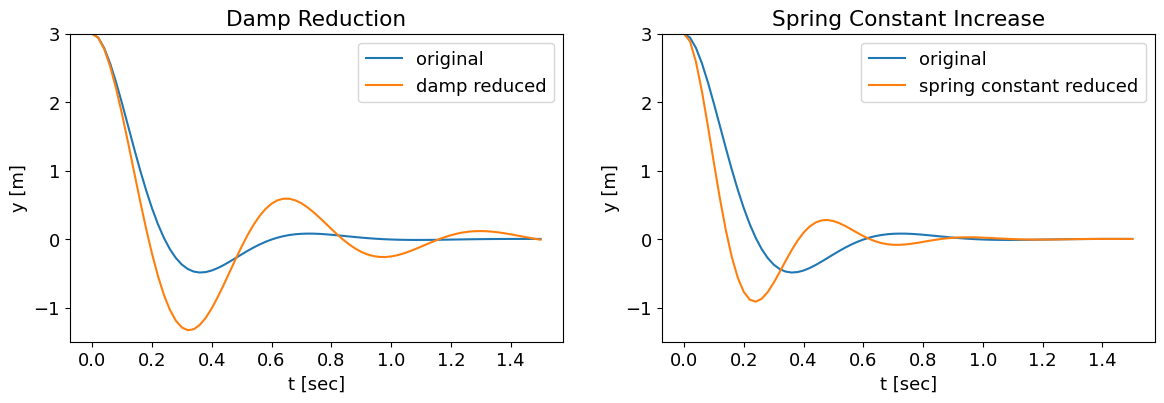

In [ ]:
# 감쇄계수 감소
f = y(t).diff(t, 2) + 5*y(t).diff(t) + 100*y(t)
ics = {y(0) : 3, y(t).diff(t).subs(t,0) : 0}

ode_sol = sympy.dsolve(f, ics = ics)
ode_sol = ode_sol.simplify()
t_vec = np.array(ts)
y_func = sympy.lambdify((t), ode_sol.rhs, "numpy")
y_damp = y_func(t_vec)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(t_vec, y_vec_E)
ax1.plot(t_vec, y_damp)
ax1.legend(['original', 'damp reduced'])
ax1.set_xlabel('t [sec]')
ax1.set_ylabel('y [m]')
ax1.title.set_text('Damp Reduction')
ax1.set_ylim([-1.5, 3])


# Spring constant increased
f = y(t).diff(t, 2) + 10*y(t).diff(t) + 200*y(t)
ics = {y(0) : 3, y(t).diff(t).subs(t,0) : 0}

ode_sol = sympy.dsolve(f, ics = ics)
ode_sol = ode_sol.simplify()
t_vec = np.array(ts)
y_func = sympy.lambdify((t), ode_sol.rhs, "numpy")
y_spring = y_func(t_vec)

ax2 = fig.add_subplot(122)
ax2.plot(t_vec, y_vec_E)
ax2.plot(t_vec, y_spring)
ax2.set_ylim([-1.5, 3])
ax2.legend(['original', 'spring constant reduced'])
ax2.set_xlabel('t [sec]')
ax2.set_ylabel('y [m]')
ax2.title.set_text('Spring Constant Increase')

## 문제 1-(5)
(5)	위에서 감쇄계수 감소 혹은 스프링 계수 증가에 따른 수치해석 해의 변화를 서술하세요.

### 답 1-(5): 1-(5) 답 : 감쇄계수가 감소하거나 스프링 계수가 증가할 수록 물체는 비감쇠 강제진동을 하면서 y방향의 진폭이 무한대로 접근하게 된다. 따라서 감쇄계수의 영향을 무시할 수 있을 정도가 되면 C=0으로 두고 풀 수 있으며 더욱 간단화된 수치해석 식을 얻을 수 있다.